# Plotting aggregate variables

Pyam offers many great visualisation and analysis tools. In this notebook we highlight the `aggregate` and `stack_plot` methods of an `IamDataFrame`. 

In [1]:
import numpy as np
import pandas as pd

import pyam

<IPython.core.display.Javascript object>

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt

Here we provide some sample data for this tutorial. This data is for a single model-scenario-region combination but provides multiple subsectors of CO$_2$ emissions. The emissions in the subsectors are both positive and negative and so provide a good test of the flexibility of our aggregation and plotting routines.

In [3]:
df = pyam.IamDataFrame(pd.DataFrame([
    ['IMG', 'a_scen', 'World', 'Emissions|CO2|Energy|Oil', 'Mt CO2/yr', 2, 3.2, 2.0, 1.8],
    ['IMG', 'a_scen', 'World', 'Emissions|CO2|Energy|Gas', 'Mt CO2/yr', 1.3, 1.6, 1.0, 0.7],
    ['IMG', 'a_scen', 'World', 'Emissions|CO2|Energy|BECCS', 'Mt CO2/yr', 0.0, 0.4, -0.4, 0.3],
    ['IMG', 'a_scen', 'World', 'Emissions|CO2|Cars', 'Mt CO2/yr', 1.6, 3.8, 3.0, 2.5],
    ['IMG', 'a_scen', 'World', 'Emissions|CO2|Tar', 'Mt CO2/yr', 0.3, 0.35, 0.35, 0.33],
    ['IMG', 'a_scen', 'World', 'Emissions|CO2|Agg', 'Mt CO2/yr', 0.5, -0.1, -0.5, -0.7],
    ['IMG', 'a_scen', 'World', 'Emissions|CO2|LUC', 'Mt CO2/yr', -0.3, -0.6, -1.2, -1.0]
    ],
    columns=['model', 'scenario', 'region', 'variable', 'unit', 2005, 2010, 2015, 2020],
))
df.head()

,model,scenario,region,variable,unit,year,value
0,IMG,a_scen,World,Emissions|CO2|Agg,Mt CO2/yr,2005,0.5
1,IMG,a_scen,World,Emissions|CO2|Agg,Mt CO2/yr,2010,-0.1
2,IMG,a_scen,World,Emissions|CO2|Agg,Mt CO2/yr,2015,-0.5
3,IMG,a_scen,World,Emissions|CO2|Agg,Mt CO2/yr,2020,-0.7
4,IMG,a_scen,World,Emissions|CO2|Cars,Mt CO2/yr,2005,1.6


Pyam's `stack_plot` method plots the stacks in the clearest way possible, even when some emissions are negative. The optional `total` keyword arguments also allows the user to include a total line on their plot.

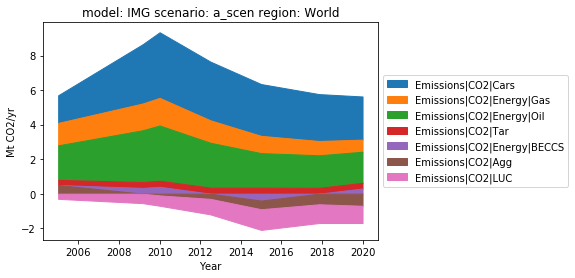

In [5]:
df.stack_plot();

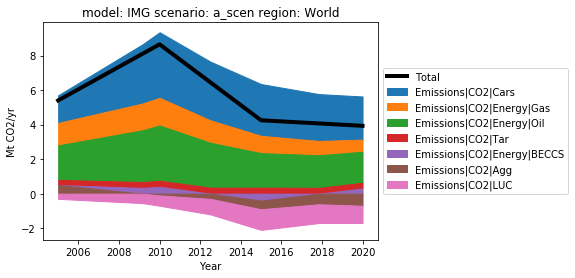

In [6]:
df.stack_plot(total=True);

The appearance of the stackplot can be simply controlled via ``kwargs``. The appearance of the total line is controlled by passing a dictionary to the `total_kwargs` keyword argument.

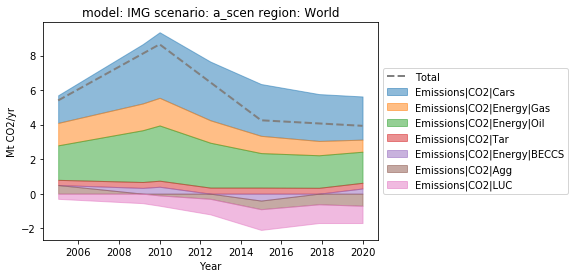

In [8]:
df.stack_plot(alpha=0.5, total={"color": "grey", "ls": "--", "lw": 2.0});

If the user wishes, they can firstly filter their data before plotting.

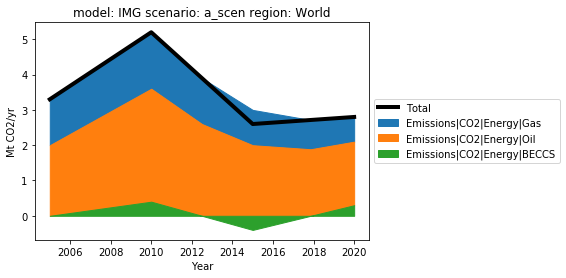

In [9]:
df.filter(variable="Emissions|CO2|Energy*").stack_plot(total=True);

Using `aggregate`, it is possible to create arbitrary sums of sub-sectors before plotting.

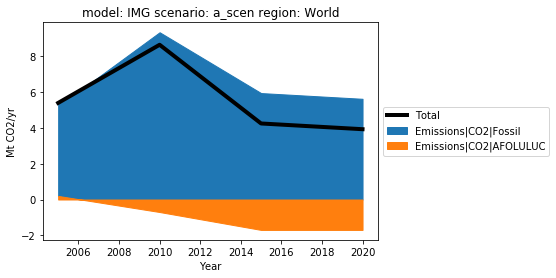

In [10]:
pdf = df.copy()
afoluluc_vars = ["Emissions|CO2|LUC", "Emissions|CO2|Agg"]
fossil_vars = list(set(pdf.variables()) - set(afoluluc_vars))
pdf.aggregate(
    "Emissions|CO2|AFOLULUC", 
    components=afoluluc_vars, 
    append=True
)
pdf.aggregate(
    "Emissions|CO2|Fossil", 
    components=fossil_vars, 
    append=True
)
pdf.filter(variable=[
    "Emissions|CO2|AFOLULUC",
    "Emissions|CO2|Fossil"
]).stack_plot(total=True);